In [1]:
%load_ext autoreload

In [2]:
%autoreload

import pandas as pd
import seaborn as sns
import utilities as utils

from featurewiz import FeatureWiz

Imported 0.3.2 version. Select nrows to a small number when running on huge datasets.
output = featurewiz(dataname, target, corr_limit=0.90, verbose=2, sep=',', 
		header=0, test_data='',feature_engg='', category_encoders='',
		dask_xgboost_flag=False, nrows=None, skip_sulov=False, skip_xgboost=False)
Create new features via 'feature_engg' flag : ['interactions','groupby','target']



### Import and process data

In [26]:
data_list = utils.read_data()
Data = utils.DataProcessor(data_list)
df = Data.create_train_data()
df.sort_index(inplace=True)
df = df.loc['2019-09-04 08:00:00':]

### Feature Engineering with FeatureWiz

In [27]:
X_train = df.drop(['pv_measurement'], axis=1)
y_train = df['pv_measurement'] 

X_test = Data.create_test_data()

wiz = FeatureWiz(verbose=1)
        X_train_selected = wiz.fit_transform(X_train, y_train)
        X_test_selected = wiz.transform(X_test)
        wiz.features  ### provides a list of selected features ###            
        
############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
featurewiz has selected 0.9 as the correlation limit. Change this limit to fit your needs...
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Regression problem ####
    Loaded train data. Shape = (84798, 54)
    Some column names had special characters which were removed...
#### Single_Label Re

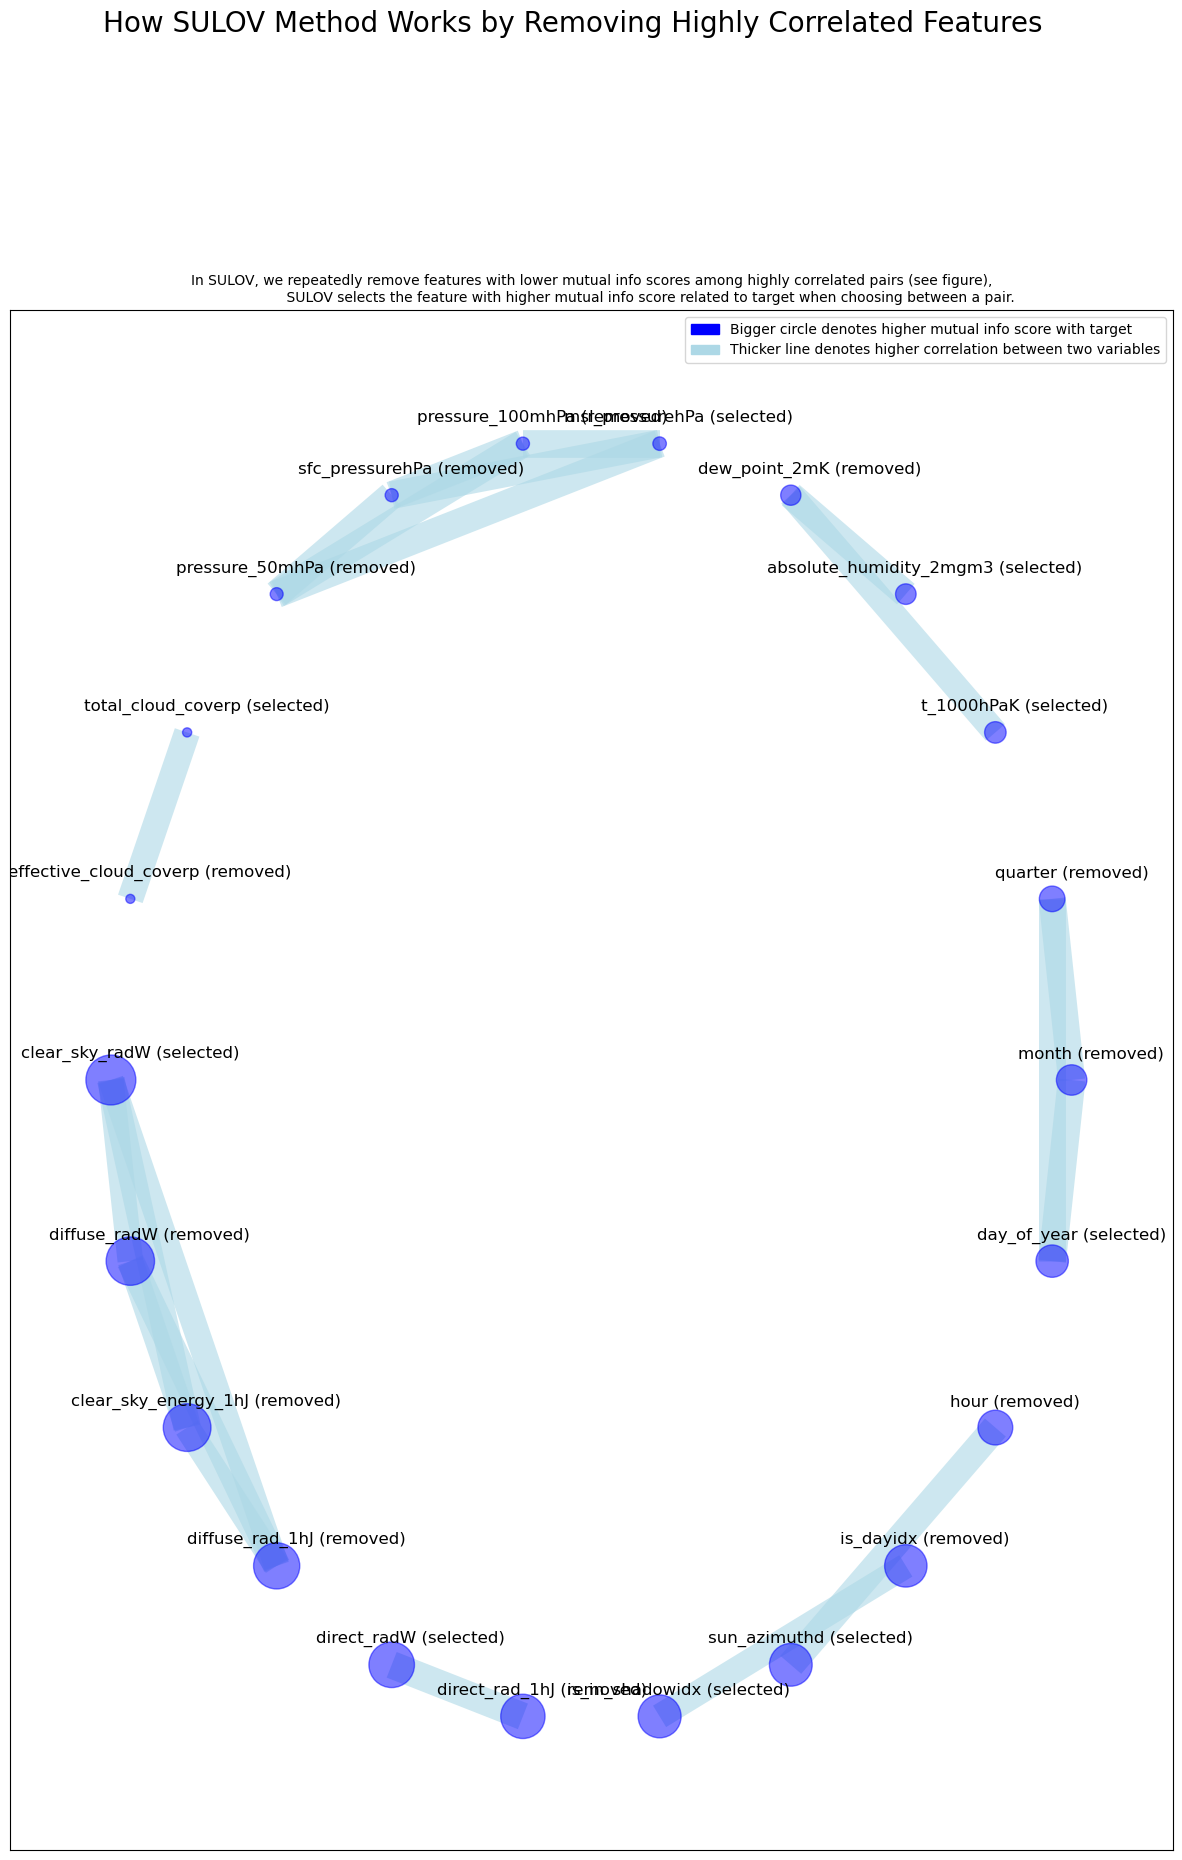

Time taken for SULOV method = 11 seconds
    Adding 0 categorical variables to reduced numeric variables  of 38
Finally 38 vars selected after SULOV
Converting all features to numeric before sending to XGBoost...
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
    Taking top 10 features per iteration...
    XGBoost version using 1.7.6 as tree method: hist
    Number of booster rounds = 100
        Selected: ['direct_radW', 'elevationm', 'sun_elevationd', 'sun_azimuthd', 'clear_sky_radW', 'day_of_year', 'wind_speed_u_10mms', 'msl_pressurehPa', 'ceiling_height_aglm', 'absolute_humidity_2mgm3']
            Time taken for regular XGBoost feature selection = 27 seconds
        Selected: ['direct_radW', 'building', 'sun_elevationd', 'sun_azimuthd', 'clea

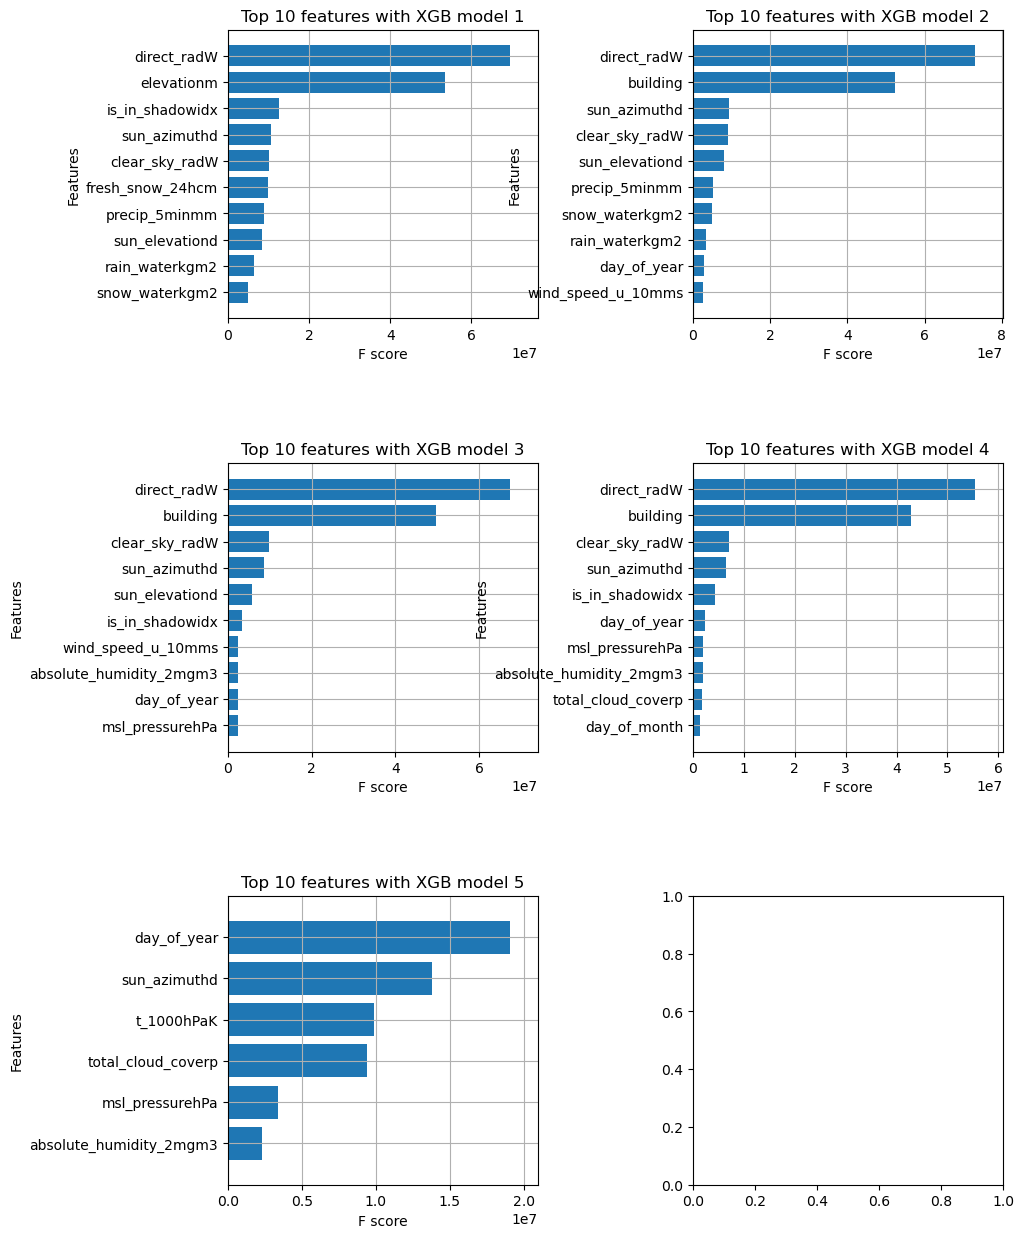

    Completed XGBoost feature selection in 20 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 14 important features:
['direct_radW', 'elevationm', 'sun_elevationd', 'sun_azimuthd', 'clear_sky_radW', 'day_of_year', 'wind_speed_u_10mms', 'msl_pressurehPa', 'ceiling_height_aglm', 'absolute_humidity_2mgm3', 'building', 't_1000hPaK', 'total_cloud_coverp', 'day_of_month']
Total Time taken for featurewiz selection = 136 seconds
Output contains a list of 14 important features and a train dataframe
    Time taken to create entire pipeline = 135 second(s)


['direct_rad:W',
 'elevation:m',
 'sun_elevation:d',
 'sun_azimuth:d',
 'clear_sky_rad:W',
 'day_of_year',
 'wind_speed_u_10m:ms',
 'msl_pressure:hPa',
 'ceiling_height_agl:m',
 'absolute_humidity_2m:gm3',
 'building',
 't_1000hPa:K',
 'total_cloud_cover:p',
 'day_of_month']

In [28]:
fwiz = FeatureWiz(corr_limit=0.90, feature_engg='', category_encoders='', dask_xgboost_flag=False, nrows=None, verbose=2)
X_train_selected = fwiz.fit_transform(X_train, y_train)
X_train_selected = fwiz.transform(X_test)

fwiz.features

In [19]:
X_train_selected.head()

,direct_rad:W,elevation:m,sun_elevation:d,sun_azimuth:d,air_density_2m:kgm3,sfc_pressure:hPa,wind_speed_u_10m:ms,cloud_base_agl:m,ceiling_height_agl:m,visibility:m,relative_humidity_1000hPa:p,wind_speed_v_10m:ms,wind_speed_10m:ms,effective_cloud_cover:p,fresh_snow_24h:cm,wind_speed_w_1000hPa:ms
date_forecast,,,,,,,,,,,,,,,,
2023-05-01 00:00:00,0.0,6.0,-11.185,10.520,1.286,1013.299988,2.2,1041.199951,912.700012,30210.699219,80.300003,3.4,4.0,80.699997,0.0,-0.0
2023-05-01 00:00:00,0.0,7.0,-11.184,10.521,1.283,1013.200012,2.2,1039.900024,912.299988,31329.500000,80.300003,3.4,4.0,80.699997,0.0,-0.0
2023-05-01 00:00:00,0.0,24.0,-11.223,10.519,1.286,1010.799988,1.5,1178.000000,NaN,31411.000000,81.099998,3.1,3.5,73.699997,0.0,-0.0
2023-05-01 00:15:00,0.0,6.0,-10.825,14.203,1.287,1013.200012,2.1,1054.800049,912.700012,30003.599609,80.300003,3.4,4.0,77.000000,0.0,-0.0
2023-05-01 00:15:00,0.0,7.0,-10.824,14.204,1.283,1013.000000,2.1,1053.099976,912.299988,31181.599609,80.300003,3.4,4.0,77.099998,0.0,-0.0
